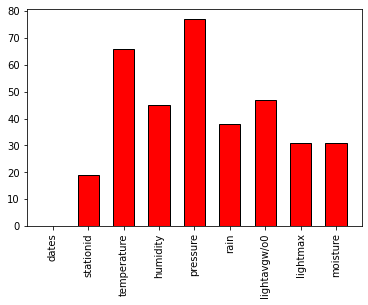

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#question 1

df = pd.read_csv("landslide_data3_miss.csv") #reading the csv database with missing data
orig_df = pd.read_csv("landslide_data3_original.csv") #reading the original csv
headers = list(df.columns.values) #getting all the headings as a list
use = df.isnull().sum() # getting the summ of all the null values in a column
plt.bar(headers,use[headers],width=0.6, color = "red" , edgecolor = "black") # plotting the data
plt.xticks(rotation=90)
plt.show()

In [11]:
#Question 2
#Part A
print("The initial number of rows = ", df.shape[0])
no_nan_df = df[df['stationid'].notnull()]
print("The new number of rows = ", no_nan_df.shape[0])
print("Therefore the number of rows removed = ", (df.shape[0] - no_nan_df.shape[0]))
#Part B
print("The initial number of rows after part(a) = ", no_nan_df.shape[0])
new_df = no_nan_df[no_nan_df.isnull().sum(axis=1) < 3] #axis = 1 represents columns and axis = 0 represents rows
print("The new number of rows = ", new_df.shape[0])
print("Therefore the number of rows further removed = ", (no_nan_df.shape[0] - new_df.shape[0]))


The initial number of rows =  945
The new number of rows =  926
Therefore the number of rows removed =  19
The initial number of rows after part(a) =  926
The new number of rows =  891
Therefore the number of rows further removed =  35


In [8]:
#Question 3
print('Number of missing values after step 2:')
print(new_df.isnull().sum())
print('Total number of missing values from the new database=',new_df.isnull().sum().sum())

Number of missing values after step 2:
dates            0
stationid        0
temperature     34
humidity        13
pressure        41
rain             6
lightavgw/o0    15
lightmax         1
moisture         6
dtype: int64
Total number of missing values from the new database= 116


*****************************************************************************************************************************
temperature
*****************************************************************************************************************************
The mean for temperature attribute in the database filled with mean is = 21.078545369738393
The mean for temperature attribute in the original database is = 21.214888105820148

The median for temperature attribute in the database filled with mean is = 21.8
The median for temperature attribute in the original database is = 22.27273

The mode for temperature attribute in the database filled with mean is = 21.078545369738354
The mode for temperature attribute in the original database is = 12.72727

The value of RMSE for the attribute temperature for the original vs database filled with mean =  3.6488620450608193
***********************************************************************************************************************

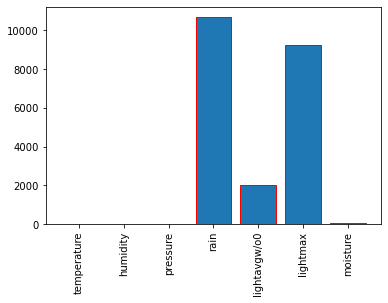

*****************************************************************************************************************************
temperature
*****************************************************************************************************************************
The mean for temperature attribute in the database filled using interpolation is = 21.196222460317497
The mean for temperature attribute in the original database is = 21.214888105820148

The median for temperature attribute in the database filled using interpolation is = 22.16921
The median for temperature attribute in the original database is = 22.27273

The mode for temperature attribute in the database filled using interpolation is = 12.72727
The mode for temperature attribute in the original database is = 12.72727

The value of RMSE for the attribute temperature for the original vs database filled using interpolation =  1.4607948810769855
*************************************************************************************

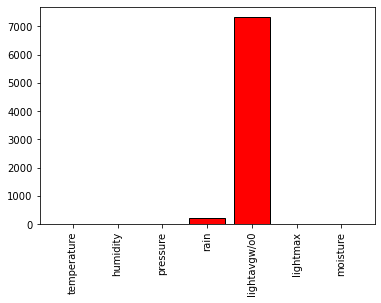

In [9]:
#Question 4
index=[] # we will store all the rows with NaN for an attribute in this list

for i in range(len(headers)):
    if (i==0 or i==1):
        continue
    else:
        a = new_df[new_df[headers[i]].isnull()].index
        index.append(a)
    
def rmse_calc(list1,list2,a):
    summ=0
    for i in range(len(index[a])):
        summ=summ+((list1[index[a][i]]-list2[index[a][i]])**2)
    rmse=summ/len(index[a])
    rmse=rmse**0.5
    return rmse


#---------Using replacement by mean------------#

new_df_mean = df.copy()

for i in range(len(headers)):
    if (i==0 or i==1):
        continue
    else:
        new_df_mean[headers[i]].fillna(new_df_mean[headers[i]].mean(),inplace=True)

xvalmean = []
yvalmean = []
        

for i in range(len(headers)):
    if (i==0 or i==1):
        continue
    else:
        print("*****************************************************************************************************************************")
        print(headers[i])
        print("*****************************************************************************************************************************")
        print("The mean for " + headers[i] + " attribute in the database filled with mean is = " + str(new_df_mean[headers[i]].mean()))
        print("The mean for " + headers[i] + " attribute in the original database is = " + str(orig_df[headers[i]].mean()))
        print()
        print("The median for " + headers[i] + " attribute in the database filled with mean is = " + str(new_df_mean[headers[i]].median()))
        print("The median for " + headers[i] + " attribute in the original database is = " + str(orig_df[headers[i]].median()))
        print()
        print("The mode for " + headers[i] + " attribute in the database filled with mean is = " + str(new_df_mean[headers[i]].mode()[0]))
        print("The mode for " + headers[i] + " attribute in the original database is = " + str(orig_df[headers[i]].mode()[0]))
        print()
        rms1=rmse_calc(orig_df[headers[i]],new_df_mean[headers[i]],i-2)
        print("The value of RMSE for the attribute "+ headers[i] + " for the original vs database filled with mean = ",rms1)
        xvalmean.append(headers[i])
        yvalmean.append(rms1)
        print("*****************************************************************************************************************************")
        print()

plt.bar(xvalmean,yvalmean, edgecolor = 'red')
plt.xticks(rotation = 90,size = 10)
plt.show()
#-------Using linear interpolation-------------#

new_df_inter = df.copy()

for i in range(len(headers)):
    if (i==0 or i==1):
        continue
    else:
        new_df_inter[headers[i]].interpolate(method = 'linear',limit_direction = 'forward',inplace = True)

xvalinter = []
yvalinter = []
        
for i in range(len(headers)):
    if (i==0 or i==1):
        continue
    else:
        print("*****************************************************************************************************************************")
        print(headers[i])
        print("*****************************************************************************************************************************")
        print("The mean for " + headers[i] + " attribute in the database filled using interpolation is = " + str(new_df_inter[headers[i]].mean()))
        print("The mean for " + headers[i] + " attribute in the original database is = " + str(orig_df[headers[i]].mean()))
        print()
        print("The median for " + headers[i] + " attribute in the database filled using interpolation is = " + str(new_df_inter[headers[i]].median()))
        print("The median for " + headers[i] + " attribute in the original database is = " + str(orig_df[headers[i]].median()))
        print()
        print("The mode for " + headers[i] + " attribute in the database filled using interpolation is = " + str(new_df_inter[headers[i]].mode()[0]))
        print("The mode for " + headers[i] + " attribute in the original database is = " + str(orig_df[headers[i]].mode()[0]))
        print()
        rms2 = rmse_calc(orig_df[headers[i]],new_df_inter[headers[i]],i-2)
        print("The value of RMSE for the attribute "+ headers[i] + " for the original vs database filled using interpolation = ",rms2)
        xvalinter.append(headers[i])
        yvalinter.append(rms2)
        print("*****************************************************************************************************************************")
        print()
        
plt.bar(xvalinter,yvalinter,color = "red" , edgecolor = "black")
plt.xticks(rotation = 90,size = 10)
plt.show()

*****************************************************************************************************************************
temperature
The iqr for the attibute temperature = 6.101980000000001
The median for the attibute temperature = 22.16921


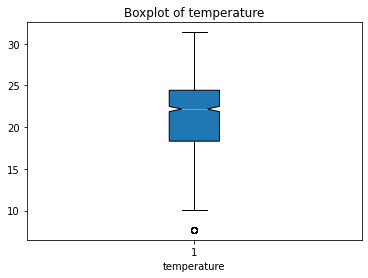

The number of outliers = 10
The outliers are: 
[7.6729, 7.6729, 7.6729, 7.6729, 7.6729, 7.6729, 7.6729, 7.6729, 7.6729, 7.6729]

*****************************************************************************************************************************
*****************************************************************************************************************************
Rain
The iqr for the attibute rain = 987.75
The median for the attibute rain = 22.5


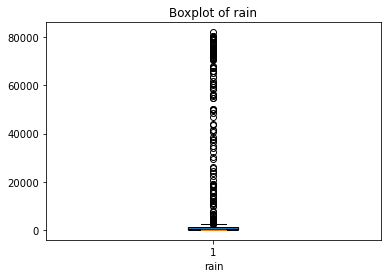

The number of outliers = 185
The outliers are: 
[13583.25, 6791.625, 15459.75, 14001.75, 16571.25, 13666.5, 59982.75, 80000.0, 75048.75, 80000.0, 80000.0, 80000.0, 80000.0, 3930.5, 36636.75, 40789.0, 2470.5, 63256.5, 54616.5, 50172.75, 37928.25, 26178.75, 3138.75, 3449.25, 18884.25, 9765.0, 18976.5, 30393.0, 2814.75, 25697.25, 80000.0, 82037.25, 56319.75, 71968.5, 80000.0, 80000.0, 50242.5, 80000.0, 80000.0, 80000.0, 80000.0, 80000.0, 80000.0, 80000.0, 80000.0, 80000.0, 80000.0, 80000.0, 80000.0, 80000.0, 80000.0, 80000.0, 80000.0, 80000.0, 80000.0, 80000.0, 80000.0, 80000.0, 80000.0, 80000.0, 80000.0, 80000.0, 80000.0, 80000.0, 80000.0, 80000.0, 80000.0, 80000.0, 60675.75, 41463.0, 22250.25, 2637.0, 80000.0, 80000.0, 80000.0, 80000.0, 80000.0, 80000.0, 80000.0, 37392.75, 49725.0, 80000.0, 80000.0, 71154.0, 80000.0, 80000.0, 12854.25, 34879.5, 4610.25, 6210.0, 10557.0, 3451.5, 3312.0, 18285.75, 3613.5, 2893.5, 23474.25, 14042.25, 3647.25, 5877.0, 10062.0, 17997.75, 29517.75, 32514.75, 

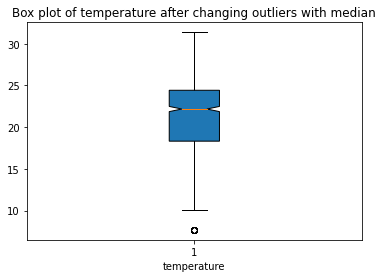

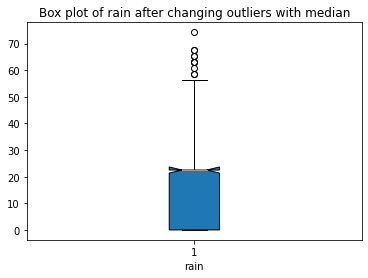

In [10]:
#Question 5
#Part A

rain = new_df_inter['rain'].tolist()
temp = new_df_inter['temperature'].tolist()

def qu5(list,istr):
    q1 = np.percentile(list,25)
    q2 = np.percentile(list,50)
    q3 = np.percentile(list,75)
    iqr = q3-q1
    print("The iqr for the attibute " + istr + " = " + str(iqr))
    print("The median for the attibute " + istr + " = " + str(q2))
    high = q3 + (1.5*iqr)
    low = q1 - (1.5*iqr)
    out_in = []
    out_val =[]
    for i in range (len(list)):
        if (list[i]>high or list[i]<low):
            out_in.append(i)
            out_val.append(list[i])
    plt.boxplot(list,notch = "True" , patch_artist= "True")
    plt.title ("Boxplot of "+istr)
    plt.xlabel(istr)
    plt.show()
    print("The number of outliers = "+ str(len(out_in)))
    print("The outliers are: ")
    print(out_val)

    
print("*****************************************************************************************************************************")
print("temperature")
qu5(temp,"temperature")
print()
print("*****************************************************************************************************************************")

print("*****************************************************************************************************************************")
print("Rain")
qu5(rain,"rain")
print()
print("*****************************************************************************************************************************")


median_r=new_df_inter["rain"].median()
median_t=new_df_inter["temperature"].median()

print("-----------------Question 5(b)-----------------")

new_df_inter["rain"] = np.where(new_df_inter["rain"] >75, median_r,new_df_inter['rain'])
new_df_inter["temperature"] = np.where(new_df_inter["temperature"] >75, median_t,new_df_inter['temperature'])

plt.boxplot(new_df_inter["temperature"],notch = "True" , patch_artist= "True")
plt.title("Box plot of temperature after changing outliers with median")
plt.xlabel("temperature")
plt.show()
plt.boxplot(new_df_inter["rain"],notch = "True" , patch_artist= "True")
plt.title("Box plot of rain after changing outliers with median")
plt.xlabel("rain")
plt.show()
